# Iris Dataset Description

#### Dataset includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

#### The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

## Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import uuid
import os
import shutil
import pickle
from datetime import datetime
from subprocess import run, Popen, PIPE

import pandas as pd
import numpy as np
from typing import  List
from datetime import datetime
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import joblib

from subprocess import run, Popen, PIPE

import pandas as pd
import numpy as np
from typing import  List
from datetime import datetime
from minio import Minio
import pandas as pd
import uuid
import os
import shutil
import pickle

In [2]:
#!pip install seaborn


## Loading the dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/katonic-dev/Examples/master/data/Iris.csv")

### Manipulating the data



In [4]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [5]:
df.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

##### Shape of the data set

In [6]:
print(df.shape)

(150, 6)


#####  Describe the statistics about the data

In [7]:
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


## Preprocessing the dataset

##### Remove the ID column from the data

In [8]:
df = df.drop(columns = ['Id'])

In [9]:
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

##### Describe the statistics about the data

In [10]:
print(df.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


##### Information about the data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##### Display no. of samples on each class

In [12]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

##### Checking for the null values

In [13]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

Total    %
SepalLengthCm      0  0.0
SepalWidthCm       0  0.0
PetalLengthCm      0  0.0
PetalWidthCm       0  0.0
Species            0  0.0

### Exploratory data analysis

##### Histogram

<AxesSubplot:>

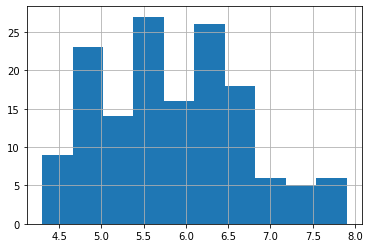

In [14]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

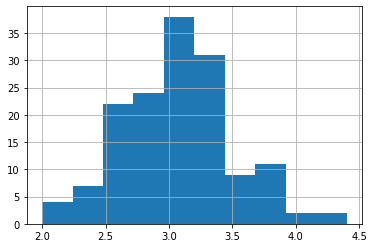

In [15]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

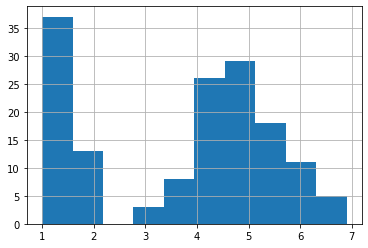

In [16]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

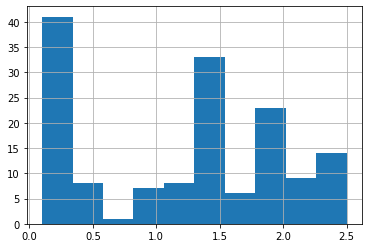

In [17]:
df['PetalWidthCm'].hist()

##### Scatterplot

In [18]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']

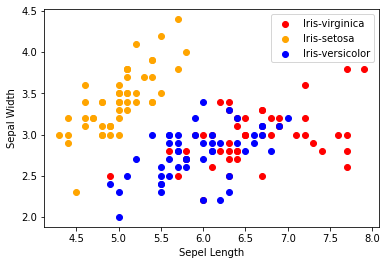

In [19]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepel Length")
plt.ylabel("Sepal Width")
plt.legend()

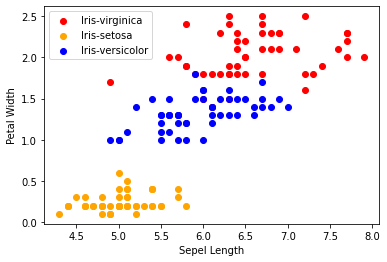

In [20]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepel Length")
plt.ylabel("Petal Width")
plt.legend()

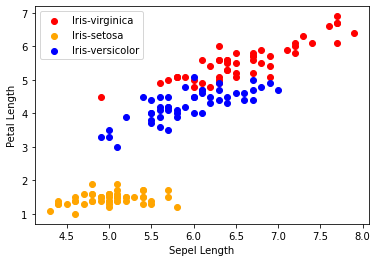

In [21]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepel Length")
plt.ylabel("Petal Length")
plt.legend()

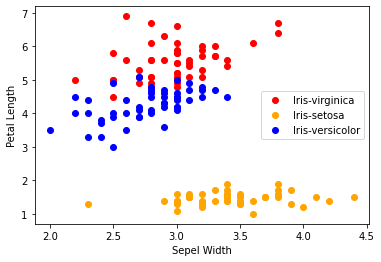

In [22]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalLengthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepel Width")
plt.ylabel("Petal Length")
plt.legend()

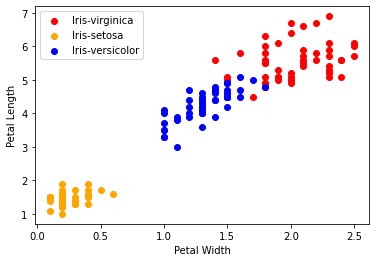

In [23]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalWidthCm'], x['PetalLengthCm'], c = colors[i], label = species[i])
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")
plt.legend()

### Correlation Matrix
##### A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table showns the correlation between two variables. The values in the range of -1 to 1. If two variables have high correlations, we can neglect one variable from those two.

In [24]:
df.corr()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

### Label Encoder
##### In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels info the labels into numeric form so as to convert it into the machine-readable form.

In [25]:
le = LabelEncoder()

In [26]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0

In [27]:
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [28]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [29]:
X = df.drop(columns = ['Species'])
Y = df['Species']

## logistic_regression

In [30]:

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, Y, test_size=0.30)

In [31]:
logreg = LogisticRegression(solver='lbfgs', max_iter=110)
lr = logreg.fit(X_train_lr, y_train_lr)
acc_log = round(logreg.score(X_train_lr, y_train_lr) * 100, 2)
acc_log

98.1

## random_forest

In [32]:

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, Y, test_size=0.30)

In [33]:
random_forest = RandomForestClassifier(n_estimators=100)
rf = random_forest.fit(X_train_rf, y_train_rf)
acc_random_forest = round(random_forest.score(X_train_rf, y_train_rf) * 100, 2)
acc_random_forest

100.0

## gaussian_naive_bayes

In [34]:

X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(X, Y, test_size=0.30)

In [35]:
gaussian = GaussianNB()
gnb = gaussian.fit(X_train_gnb, y_train_gnb)
acc_gaussian = round(gaussian.score(X_train_gnb, y_train_gnb) * 100, 2)
acc_gaussian

97.14

## support_vector_machine

In [36]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, Y, test_size=0.30)

In [37]:
linear_svc = SVC(gamma='auto')
svm = linear_svc.fit(X_train_svm, y_train_svm)
acc_linear_svc = round(linear_svc.score(X_train_svm, y_train_svm) * 100, 2)
acc_linear_svc

98.1

## decision_tree

In [38]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, Y, test_size=0.30)

In [39]:
decision_tree = DecisionTreeClassifier()
dt = decision_tree.fit(X_train_dt, y_train_dt)
acc_decision_tree = round(decision_tree.score(X_train_dt, y_train_dt) * 100, 2)
acc_decision_tree

100.0

## perceptron

In [40]:
X_train_per, X_test_per, y_train_per, y_test_per = train_test_split(X, Y, test_size=0.30)

In [41]:
perceptron = Perceptron()
per = perceptron.fit(X_train_per, y_train_per)
acc_perceptron = round(perceptron.score(X_train_per, y_train_per) * 100, 2)
acc_perceptron

76.19

## k_nearest_neighbour

In [42]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, Y, test_size=0.30)

In [43]:
knearestneighbour = KNeighborsClassifier()
knn = knearestneighbour.fit(X_train_knn, y_train_knn)
acc_knearest = round(knearestneighbour.score(X_train_knn, y_train_knn) * 100, 2)
acc_knearest

98.1

## stochastic_gradient_descent

In [44]:
X_train_sgd, X_test_sgd, y_train_sgd, y_test_sgd = train_test_split(X, Y, test_size=0.30)

In [45]:
stochasticgrad = SGDClassifier()
sgd = stochasticgrad.fit(X_train_sgd, y_train_sgd)
acc_sgd = round(stochasticgrad.score(X_train_sgd, y_train_sgd) * 100, 2)
acc_sgd

97.14

## gradient_boosting

In [46]:
X_train_gbc, X_test_gbc, y_train_gbc, y_test_gbc = train_test_split(X, Y, test_size=0.30)

In [47]:
gradientboostingclassifier = GradientBoostingClassifier()
gbc = gradientboostingclassifier.fit(X_train_gbc, y_train_gbc)
acc_gbc = round(gradientboostingclassifier.score(X_train_gbc, y_train_gbc) * 100, 2)
acc_gbc

100.0

In [51]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gaussian Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Preceptron', 'KNearest Neighbour', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_log, acc_random_forest, acc_gaussian, acc_linear_svc, acc_decision_tree, acc_perceptron, acc_knearest, acc_sgd, acc_gbc],
    'Model_abb': [lr, rf, gnb, svm, dt, per, knn, sgd, gbc]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df)

                               Model  \
Score                                  
100.00                 Random Forest   
100.00                 Decision Tree   
100.00  Gradient Boosting Classifier   
98.10            Logistic Regression   
98.10         Support Vector Machine   
98.10             KNearest Neighbour   
97.14           Gaussian Naive Bayes   
97.14    Stochastic Gradient Descent   
76.19                     Preceptron   

                                                Model_abb  
Score                                                      
100.00  (DecisionTreeClassifier(max_features='auto', r...  
100.00                           DecisionTreeClassifier()  
100.00  ([DecisionTreeRegressor(criterion='friedman_ms...  
98.10                    LogisticRegression(max_iter=110)  
98.10                                   SVC(gamma='auto')  
98.10                              KNeighborsClassifier()  
97.14                                        GaussianNB()  
97.14              

In [52]:
best_model = result_df['Model_abb'].iloc[0]
best_model

RandomForestClassifier()

In [53]:
joblib.dump(best_model, 'model.joblib')

['model.joblib']

In [54]:
Model_job = joblib.load("model.joblib")
Model_job

RandomForestClassifier()

In [55]:
pred = X_test_rf.values[44].reshape(1, -1)
pred

array([[5. , 3.2, 1.2, 0.2]])

In [56]:
Model_job.predict(pred)

array([0])